In [2]:
import numpy as np
from keras import datasets
from keras.utils import np_utils

In [15]:
def Data_func():
    (X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
    
    
    
    
    Y_train = np_utils.to_categorical(y_train)
    Y_test = np_utils.to_categorical(y_test)
    
    L, W, H, C = X_train.shape
    
    X_train = X_train.reshape(-1, W * H * C)
    X_test = X_test.reshape(-1, W * H * C)
    
    X_train = X_train / 255.0
    X_test = X_test / 255.0
    
    return (X_train, Y_train), (X_test, Y_test)

In [16]:
from keras import layers, models

In [20]:
class DNN(models.Sequential):
    def __init__(self, Nin, Nh_1, Pd_1, Nout):
        super().__init__()
    
        self.add(layers.Dense(Nh_1[0], activation = 'relu', input_shape = (Nin,), name = 'Hidden-1'))
        self.add(layers.Dropout(Pd_1[0]))
        self.add(layers.Dense(Nh_1[1], activation = 'relu', name = 'Hidden-2'))
        self.add(layers.Dropout(Pd_1[1]))
        self.add(layers.Dense(Nout, activation = 'softmax'))
        self.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
           

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import os

import matplotlib

def save_history_history(fname, history_history, fold=''):
    np.save(os.path.join(fold, fname), history_history)


def load_history_history(fname, fold=''):
    history_history = np.load(os.path.join(fold, fname)).item(0)
    return history_history


def plot_acc(history, title=None):
    # summarize history for accuracy
    if not isinstance(history, dict):
        history = history.history

    plt.plot(history['acc'])
    plt.plot(history['val_acc'])
    if title is not None:
        plt.title(title)
    plt.ylabel('Accracy')
    plt.xlabel('Epoch')
    plt.legend(['Training data', 'Validation data'], loc=0)
    # plt.show()


def plot_loss(history, title=None):
    # summarize history for loss
    if not isinstance(history, dict):
        history = history.history

    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    if title is not None:
        plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training data', 'Validation data'], loc=0)
    # plt.show()


def plot_history(history):
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plot_acc(history)
    plt.subplot(1, 2, 2)
    plot_loss(history)

    
def plot_loss_acc(history):
    plot_loss(history, '(a) Loss trajectory')
    plt.show()            
    plot_acc(history, '(b) Accracy trajectory')
    plt.show()
    
    
def plot_acc_loss(history):
    plot_acc(history, '(a) Accracy trajectory')
    plt.show()
    plot_loss(history, '(b) Loss trajectory')
    plt.show()       

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 5s 113us/step - loss: 1.9695 - acc: 0.2888 - val_loss: 1.8644 - val_acc: 0.3407
Epoch 2/10
40000/40000 [==============================] - 4s 109us/step - loss: 1.8065 - acc: 0.3575 - val_loss: 1.7879 - val_acc: 0.3629
Epoch 3/10
40000/40000 [==============================] - 4s 112us/step - loss: 1.7374 - acc: 0.3827 - val_loss: 1.7371 - val_acc: 0.3912
Epoch 4/10
40000/40000 [==============================] - 5s 113us/step - loss: 1.6817 - acc: 0.4031 - val_loss: 1.6885 - val_acc: 0.4099
Epoch 5/10
40000/40000 [==============================] - 4s 112us/step - loss: 1.6263 - acc: 0.4221 - val_loss: 1.6436 - val_acc: 0.4134
Epoch 6/10
40000/40000 [==============================] - 4s 109us/step - loss: 1.5912 - acc: 0.4295 - val_loss: 1.6343 - val_acc: 0.4216
Epoch 7/10
40000/40000 [==============================] - 4s 111us/step - loss: 1.5669 - acc: 0.4404 - val_loss: 1.6061 - 

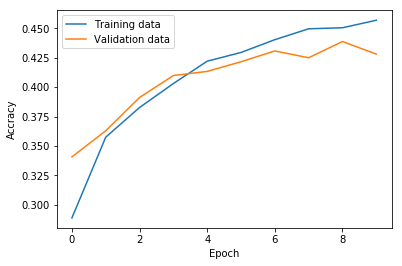

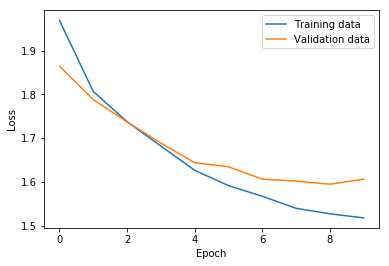

In [24]:
def main():
    Nh_1 = [100, 50]
    Pd_1 = [0.0, 0.0]
    number_of_class = 10
    Nout = number_of_class
    
    (X_train, Y_train), (X_test, Y_test) = Data_func()
    model = DNN(X_train.shape[1], Nh_1, Pd_1, Nout)
    history = model.fit(X_train, Y_train, epochs = 10, batch_size = 100, validation_split = 0.2)
    
    performance_test = model.evaluate(X_test, Y_test, batch_size = 100)
    
    print('Test Loss and Accuracy ->', performance_test)
    plot_acc(history)
    plt.show()
    plot_loss(history)
    plt.show()
    
if __name__ == '__main__':
    main()
    
    